In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('Wholesale Customers Data.csv')
print(data.shape)
data.head(6)

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451


In [4]:
# Drop non-continuous variables
data.drop(["Channel", "Region"], axis = 1, inplace = True)
print(data.head())
data.columns

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [5]:
# going to use only two of these attributes
data = data[["Grocery", "Milk","Fresh"]]

In [6]:
# normalize each attribute by scaling it to 0 mean and unit variance.
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)
#data

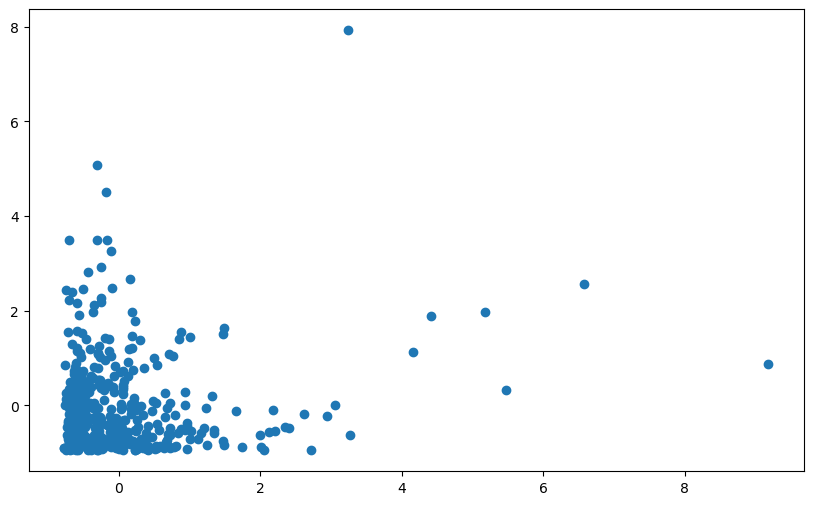

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,1], data[:,2], cmap='copper')

In [8]:
dbsc = DBSCAN(eps = .75, min_samples = 8).fit(data)
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [9]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 31


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

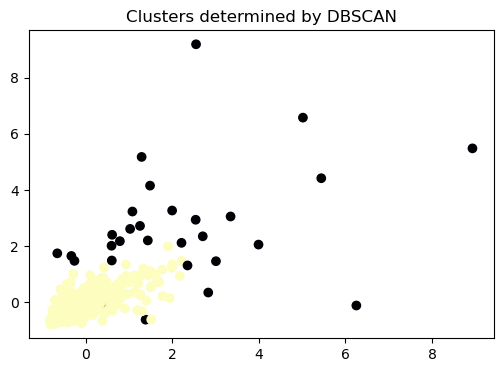

In [10]:
y_pred = dbsc.fit_predict(data)
plt.figure(figsize=(6,4))
plt.scatter(data[:,0], data[:,1],c=y_pred, cmap='magma')
plt.title("Clusters determined by DBSCAN")

In [11]:
from sklearn.datasets import make_moons
moon_X, moon_y = make_moons(n_samples=2000, noise=0.05) 
#print(moon_X)
#print(moon_y)

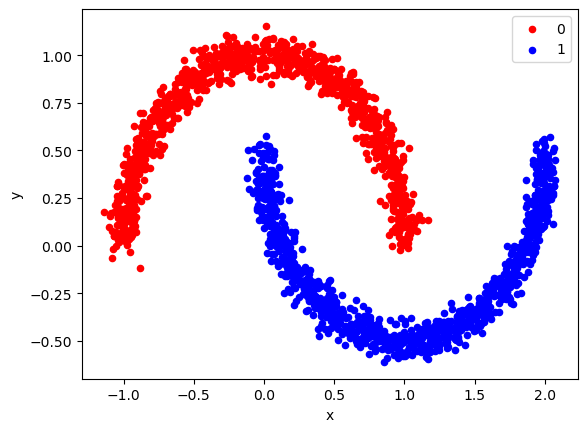

In [12]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=moon_X[:,0], y=moon_X[:,1], label=moon_y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [13]:
def add_noise(X,y, noise_level = 0.04):
    #The number of points we wish to make noisy
    amt_noise = int(noise_level*len(y))
    #Pick amt_noise points at random
    idx = np.random.choice(len(X), size = amt_noise)
    #Add random noise to these selected points
    noise = np.random.random((amt_noise, 2) ) -0.5
    X[idx,:] += noise
    return X 

moon_X=add_noise(moon_X,moon_y)

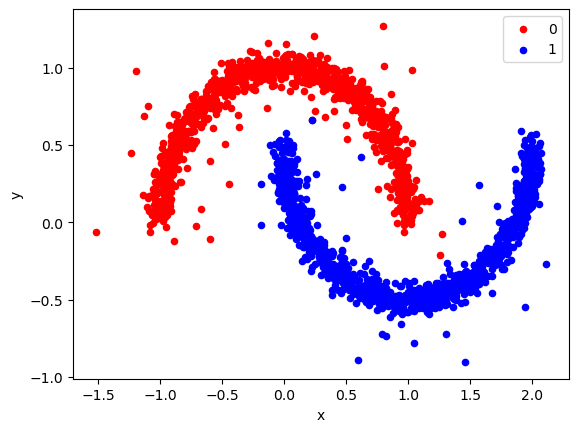

In [14]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=moon_X[:,0], y=moon_X[:,1], label=moon_y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [15]:
dbsc = DBSCAN(eps = .07, min_samples = 4).fit(moon_X)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(moon_X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 52
Silhouette Coefficient: 0.223


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

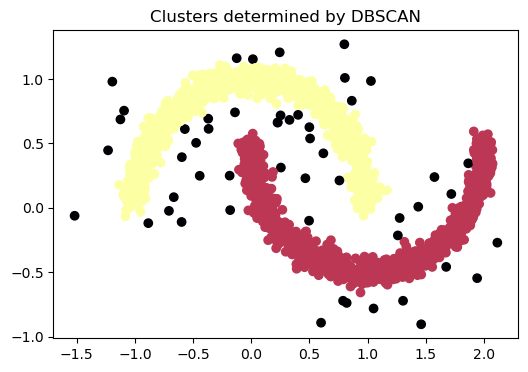

In [16]:
y_pred = dbsc.fit_predict(moon_X)
plt.figure(figsize=(6,4))
plt.scatter(moon_X[:,0], moon_X[:,1],c=y_pred, cmap='inferno')
plt.title("Clusters determined by DBSCAN")

Estimated number of clusters: 2
Estimated number of noise points: 52
Silhouette Coefficient: 0.223


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

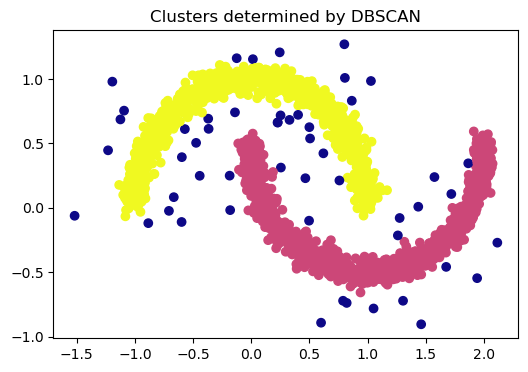

In [17]:
dbsc = DBSCAN(eps = .07, min_samples = 4).fit(moon_X)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(moon_X, labels))

y_pred = dbsc.fit_predict(moon_X)
plt.figure(figsize=(6,4))
plt.scatter(moon_X[:,0], moon_X[:,1],c=y_pred, cmap='plasma')
plt.title("Clusters determined by DBSCAN")

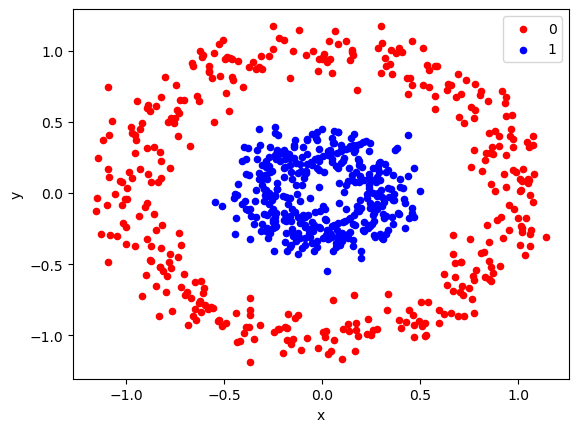

In [18]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
#X,y

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 8
Silhouette Coefficient: 0.178


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

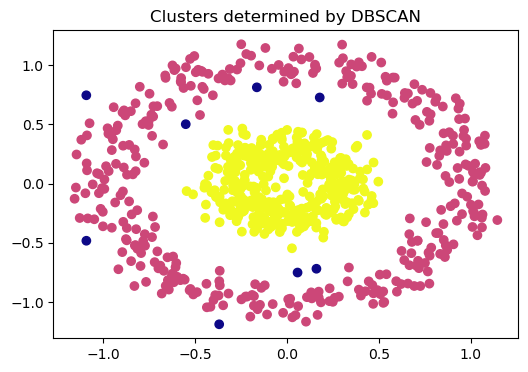

In [19]:
dbsc = DBSCAN(eps = .15, min_samples = 7).fit(X)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

y_pred = dbsc.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
plt.title("Clusters determined by DBSCAN")

Estimated number of clusters: 18
Estimated number of noise points: 107
Silhouette Coefficient: 0.235


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

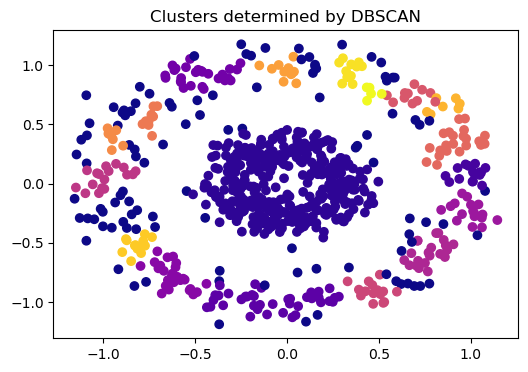

In [20]:
dbsc = DBSCAN(eps =0.1, min_samples = 7).fit(X)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

y_pred = dbsc.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
plt.title("Clusters determined by DBSCAN")

Estimated number of clusters: 2
Estimated number of noise points: 1
Silhouette Coefficient: 0.037


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

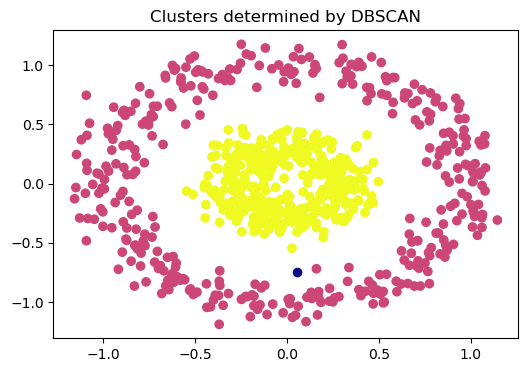

In [21]:
dbsc = DBSCAN(eps =0.18, min_samples = 4).fit(X)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

y_pred = dbsc.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
plt.title("Clusters determined by DBSCAN")